# Chapter9 pandasオブジェクトの結合

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 77. DataFrameに新たな行を追加

- ```.loc```インデクサ  
    DataFrameのコピーが返されない
- ```append```メソッド  
    呼び出し元のDataFrameを変更しない  
    行を追加したDataFrameを新たに作って返す

In [2]:
# 1) 
names = pd.read_csv("Pandas-Cookbook-master/data/names.csv")
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [3]:
# 2) 新たなデータリストを作成して追加
new_data_list = ["Aria", 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [4]:
# 3) locに非数値ラベルを使ってみる
names.loc["five"] = ["Zach", 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [5]:
# 4) 辞書を使って行を追加
names.loc[len(names)] = {"Name":"Zayd", "Age":2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [6]:
# 5) Seriesを追加
names.loc[len(names)] = pd.Series({"Age":32, "Name":"Dean"})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [7]:
# 6) appendで辞書に追加
names = pd.read_csv("Pandas-Cookbook-master/data/names.csv")
type(names)

pandas.core.frame.DataFrame

- appendをDataFrameに対して行うとエラーになる  

```Python
names.append({"Name":"Aria", "Age":1})
```

```markdown
TypeError: Can only append a dict if ignore_index=True
```

In [8]:
# 7) ignore_index=Tureにしてappendする
names.append({"Name":"Aria", "Age":1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [9]:
# 8) ignore_indexの問題点確認①
names.index = ["Canada", "Canada", "USA", "USA"]
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [10]:
# 9) ignore_indexの問題点確認②
s = pd.Series({"Name":"Zach", "Age":3}, name=len(names)) # name属性のあるSeries
s

Name    Zach
Age        3
Name: 4, dtype: object

In [11]:
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


In [12]:
# 10) 複数のSeriesを使ってappendメソッドで追加
s1 = pd.Series({"Name":"Zach", "Age": 3}, name=len(names))
s2 = pd.Series({"Name":"Zayd", "Age": 2}, name="USA")
names.append([s1, s2])

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3
USA,Zayd,2


In [13]:
# 11) 2016年の野球のデータセット
bball_16 = pd.read_csv("Pandas-Cookbook-master/data/baseball16.csv")
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [14]:
# 12) to_dictメソッドで辞書として行の値を得る
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [15]:
# 13) 辞書の元の値を　文字列＝"", その他=np.nan を代入してクリアする
new_dict_dict = {k: "" if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_dict_dict)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


## 78. 複数のDataFrameの結合

In [16]:
# 1)
stocks_2016 = pd.read_csv("Pandas-Cookbook-master/data/stocks_2016.csv", index_col="Symbol")
stocks_2017 = pd.read_csv("Pandas-Cookbook-master/data/stocks_2017.csv", index_col="Symbol")

In [17]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [18]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [19]:
# 2) データセットを一つのリストにして、concatで結合
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [20]:
# 3) keysパラメータで各行の年を指定
pd.concat(s_list, keys=["2016", "2017"], names=["Year", "Symbol"])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [21]:
# 4) axisパラメータをcolumnsか１に変えて水平方向に結合
pd.concat(s_list, keys=["2016", "2017"], axis="columns", names=["Year", None])

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0

In [22]:
# 5) concatでinner join
pd.concat(s_list, join="inner", keys=["2016", "2017"], axis="columns", names=["Year", None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## 79. トランプとオバマの大統領支持率比較

In [23]:
trump = pd.read_csv("Pandas-Cookbook-master/data/American Presidency Project - Approval Ratings for POTUS - Donald Trump.csv")
trump.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,12/1/2020,12/17/2020,39,57,4
1,11/5/2020,11/19/2020,43,55,2
2,10/16/2020,10/27/2020,46,52,2
3,9/30/2020,10/15/2020,43,55,2
4,9/14/2020,9/28/2020,46,52,2


In [24]:
# 10)
trump.insert(0, "President", "Donald J. Trump")
trump.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald J. Trump,12/1/2020,12/17/2020,39,57,4
1,Donald J. Trump,11/5/2020,11/19/2020,43,55,2
2,Donald J. Trump,10/16/2020,10/27/2020,46,52,2
3,Donald J. Trump,9/30/2020,10/15/2020,43,55,2
4,Donald J. Trump,9/14/2020,9/28/2020,46,52,2


In [25]:
trump["Start Date"] = pd.to_datetime(trump["Start Date"], format="%m/%d/%Y")
trump["End Date"] = pd.to_datetime(trump["End Date"], format="%m/%d/%Y")
trump = trump.sort_values("Start Date")

In [26]:
# 11)
trump.isnull().sum()

President        0
Start Date       0
End Date         0
Approving        0
Disapproving     0
Unsure/NoData    0
dtype: int64

In [27]:
# 12)
trump.dtypes

President                object
Start Date       datetime64[ns]
End Date         datetime64[ns]
Approving                 int64
Disapproving              int64
Unsure/NoData             int64
dtype: object

In [28]:
# 13)
def get_pres_appr(president_name, path):
    df = pd.read_csv(path)
    df.insert(0, "President", president_name)
    df["Start Date"] = pd.to_datetime(df["Start Date"], format=("%m/%d/%y" or "%m/%d/%Y"))
    df["End Date"] = pd.to_datetime(df["End Date"], format="%m/%d/%Y")
    df = df.sort_values("Start Date")
    return df

In [29]:
# 14)
obama = get_pres_appr("Barack Obama", 
                      "Pandas-Cookbook-master/data/American Presidency Project - Approval Ratings for POTUS - Barack Obama.csv")
obama.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
417,Barack Obama,2009-01-19,2009-01-25,67,13,20
416,Barack Obama,2009-01-26,2009-02-01,66,18,16
415,Barack Obama,2009-02-02,2009-02-08,65,21,14
414,Barack Obama,2009-02-09,2009-02-15,64,22,14
413,Barack Obama,2009-02-16,2009-02-22,62,25,13


In [30]:
# 15)
pres_df = pd.concat([trump, obama], ignore_index=True)
pres_df.groupby("President").agg("mean")

,Approving,Disapproving,Unsure/NoData
President,,,
Barack Obama,47.968900,45.602871,6.428230
Donald J. Trump,40.428571,54.857143,4.714286


In [31]:
# 16)
pres_df["End Date"].value_counts()

2015-07-19    1
2018-03-18    1
2013-12-08    1
2016-05-22    1
2018-11-04    1
             ..
2014-02-23    1
2011-09-11    1
2009-03-29    1
2017-03-26    1
2013-02-03    1
Name: End Date, Length: 558, dtype: int64

In [32]:
# 17)
pres_df = pres_df.drop_duplicates(subset="End Date")
pres_df.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald J. Trump,2017-01-20,2017-01-29,45,47,8
1,Donald J. Trump,2017-01-30,2017-02-05,43,52,5
2,Donald J. Trump,2017-02-06,2017-02-12,41,53,6
3,Donald J. Trump,2017-02-13,2017-02-19,40,54,6
4,Donald J. Trump,2017-02-20,2017-02-26,42,53,5


In [33]:
pres_df["End Date"].value_counts()

2015-07-19    1
2018-03-18    1
2013-12-08    1
2016-05-22    1
2018-11-04    1
             ..
2014-02-23    1
2011-09-11    1
2009-03-29    1
2017-03-26    1
2013-02-03    1
Name: End Date, Length: 558, dtype: int64

In [34]:
# 18)
pres_df.shape

(558, 6)

In [35]:
pres_df["President"].value_counts()

Barack Obama       418
Donald J. Trump    140
Name: President, dtype: int64

In [36]:
groups = pres_df.groupby("President", sort=False)
groups

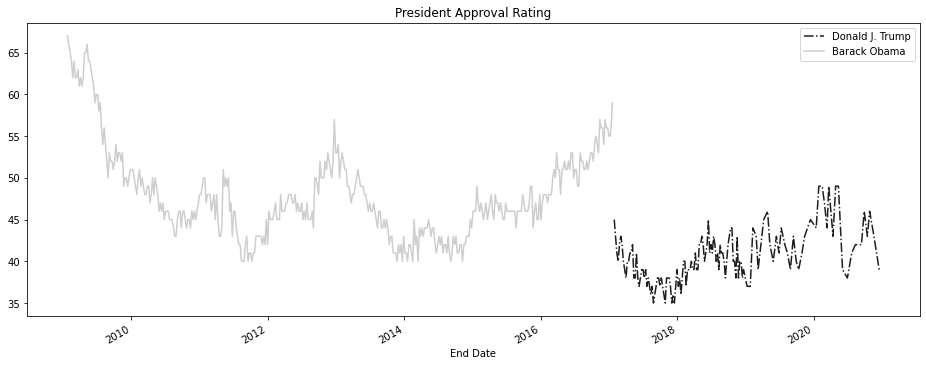

In [37]:
# 19)
from matplotlib import cm

fig, ax = plt.subplots(figsize=(16, 6))

styles = ["-.", "-"]
colors = [.9, .3]
groups = pres_df.groupby("President", sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot("End Date", "Approving", ax=ax, label=pres, style=style, color=cm.Greys(color), title="President Approval Rating")

In [38]:
# 20)
days_func = lambda x: x - x.iloc[0]

pres_df["Days in Office"] = pres_df.groupby("President")["End Date"].transform(days_func)
pres_df.groupby("President").head(3)

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Days in Office
0,Donald J. Trump,2017-01-20,2017-01-29,45,47,8,0 days
1,Donald J. Trump,2017-01-30,2017-02-05,43,52,5,7 days
2,Donald J. Trump,2017-02-06,2017-02-12,41,53,6,14 days
140,Barack Obama,2009-01-19,2009-01-25,67,13,20,0 days
141,Barack Obama,2009-01-26,2009-02-01,66,18,16,7 days
142,Barack Obama,2009-02-02,2009-02-08,65,21,14,14 days


In [39]:
# 21)
pres_df.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
Unsure/NoData               int64
Days in Office    timedelta64[ns]
dtype: object

In [40]:
# 22)
pres_df["Days in Office"] = pres_df["Days in Office"].dt.days
pres_df["Days in Office"]

0         0
1         7
2        14
3        21
4        28
       ... 
553    2891
554    2898
555    2905
556    2912
557    2916
Name: Days in Office, Length: 558, dtype: int64

In [41]:
# 23)
pres_pivot = pres_df.pivot(index="Days in Office", columns="President", values="Approving")
pres_pivot.head()

President,Barack Obama,Donald J. Trump
Days in Office,,
0,67.0,45.0
7,66.0,43.0
14,65.0,41.0
21,64.0,40.0
28,62.0,42.0


<AxesSubplot:title={'center':'Approval Rating'}, xlabel='Days in Office'>

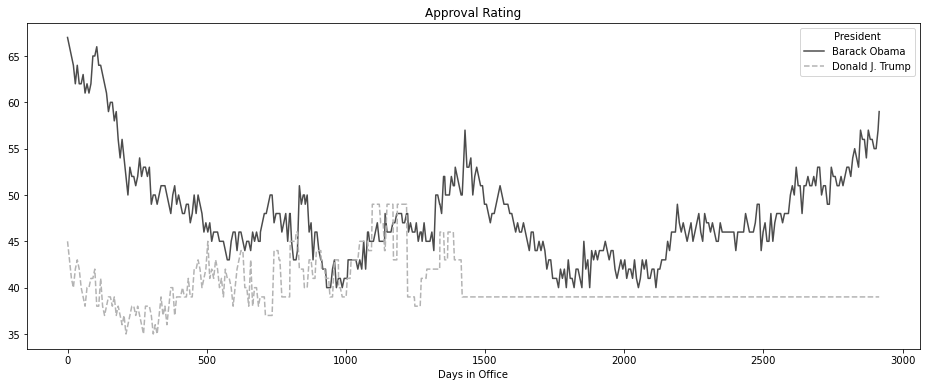

In [42]:
plot_kwargs = dict(figsize=(16, 6), color=cm.gray([.3, .7]), style=["-", "--"], title="Approval Rating")
pres_pivot.ffill().plot(**plot_kwargs)

## 80. concat, join, mergeの相違点を理解

In [43]:
# 1) IPythonで出力をコントロール
from IPython.display import display_html

years = 2016, 2017, 2018
stock_tables = [pd.read_csv("Pandas-Cookbook-master/data/stocks_{}.csv".format(year), index_col="Symbol") for year in years]

def display_frames(frames, num_spaces=0):
    t_style = "<table style = 'display: inline;'"
    tables_html = [df.to_html().replace("<table", t_style) for df in frames]
    space = "&nbsp;" * num_spaces
    display_html(space.join(tables_html), raw=True)
    
display_frames(stock_tables, 30)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [44]:
stocks_2016, stocks_2017, stocks_2018 = stock_tables

In [45]:
# 2) keyを渡してconcat
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [46]:
# 3) axisをcolumnsに変えて水平結合
pd.concat(dict(zip(years, stock_tables)), axis="columns")

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0

In [47]:
# 4)
stocks_2016.join(stocks_2017, lsuffix="_2016", rsuffix="_2017", how="outer")

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [48]:
# 5)
other = [stocks_2017.add_suffix("_2017"), stocks_2018.add_suffix("_2018")]
stocks_2016.add_suffix("_2016").join(other, how="outer")

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [49]:
# 6)
stock_join = stocks_2016.add_suffix("_2016").join(other, how="outer")
stock_concat = pd.concat(dict(zip(years, stock_tables)), axis="columns")
level_1 = stock_concat.columns.get_level_values(1)
level_0 = stock_concat.columns.get_level_values(0).astype(str)
stock_concat.columns = level_1 + "_" + level_0
stock_join.equals(stock_concat)

True

In [50]:
level_0

Index(['2016', '2016', '2016', '2017', '2017', '2017', '2018', '2018', '2018'], dtype='object')

In [51]:
level_1

Index(['Shares', 'Low', 'High', 'Shares', 'Low', 'High', 'Shares', 'Low',
       'High'],
      dtype='object')

In [52]:
stock_concat.columns

Index(['Shares_2016', 'Low_2016', 'High_2016', 'Shares_2017', 'Low_2017',
       'High_2017', 'Shares_2018', 'Low_2018', 'High_2018'],
      dtype='object')

In [53]:
# 7) mergeはデフォルトで内部ジョインをする
stocks_2016.merge(stocks_2017, left_index=True, right_index=True)

,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
Symbol,,,,,,
AAPL,80,95,110,50,120,140
TSLA,50,80,130,100,100,300


In [54]:
# 8) 外部ジョインをする
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True, how="outer", suffixes=("_2016", "_2017"))
stock_merge = step1.merge(stocks_2018.add_suffix("_2018"), left_index=True, right_index=True, how="outer")
stock_concat.sort_index().equals(stock_merge.sort_index())

True

In [55]:
# 9)
names = ["prices", "transactions"]
food_tables = [pd.read_csv("Pandas-Cookbook-master/data/food_{}.csv".format(name)) for name in names]
food_prices, food_transactions = food_tables
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [56]:
# 10) 普通に結合するとcustid2の顧客でsteakが4つ
food_transactions.merge(food_prices, on=["item", "store"])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [57]:
# 11) 2017年のpriceと結合する
food_transactions.merge(food_prices.query("Date == 2017"), how="left")

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [58]:
# 12)
food_prices_join = food_prices.query("Date == 2017").set_index(["item", "store"])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [59]:
# 13)
food_transactions.join(food_prices_join, on=["item", "store"])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN
